# GANs Image Generation

In this notebook, we will explore how Generative Adversarial Networks (GANs) generate images. We will use a pretrained GAN model (BigGAN) to generate images from random noise.

## Instructions
1. Run the code below to generate an image from random noise.
2. Modify the latent vector to generate different images.
3. Experiment with generating different images by altering the latent vector and visualizing the results.


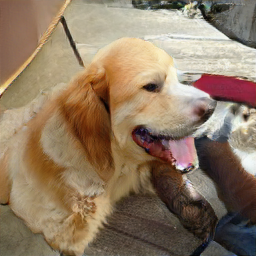

In [4]:
import torch
from pytorch_pretrained_biggan import (BigGAN, one_hot_from_int, truncated_noise_sample)
from PIL import Image
import numpy as np

# Load BigGAN
model = BigGAN.from_pretrained('biggan-deep-256')
model.eval()

# Generate noise and class vector (e.g., 207 = golden retriever)
truncation = 0.4
class_vector = one_hot_from_int([207], batch_size=1)  # Choose any ImageNet class index
noise_vector = truncated_noise_sample(truncation=truncation, batch_size=1)

# Convert to torch tensors
noise_vector = torch.from_numpy(noise_vector)
class_vector = torch.from_numpy(class_vector)

# Generate image
with torch.no_grad():
    output = model(noise_vector, class_vector, truncation)

# Convert to image
output_np = output.squeeze().permute(1, 2, 0).numpy()
output_np = ((output_np + 1) / 2.0 * 255).astype(np.uint8)
Image.fromarray(output_np)


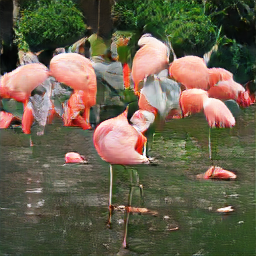

In [9]:
# Experiment with different latent vectors
class_vector = one_hot_from_int([130], batch_size=1)
noise_vector = truncated_noise_sample(truncation=truncation, batch_size=1)

noise_vector = torch.from_numpy(noise_vector)
class_vector = torch.from_numpy(class_vector)

with torch.no_grad():
    output = model(noise_vector, class_vector, truncation)

output_np = output.squeeze().permute(1, 2, 0).numpy()
output_np = ((output_np + 1) / 2.0 * 255).astype(np.uint8)
Image.fromarray(output_np)

## Reflection

Now that you have generated images, write a brief report reflecting on your observations:

1. How did the generated images change when you modified the latent vector?
2. What patterns did you notice in the generated images? Were they realistic?
3. How does the process of generating images from noise differ from traditional image generation methods?
4. What challenges or limitations did you observe with the GAN model?

1) When I changed the latent vector, the structure of the generated image shifted a lot, even if the class label stayed the same. Each latent vector influenced something like pose, background, color tone, and texture. This shows that the model is sensitive to small changes in the input noise. 
2) The image had recognizable features of the target class, like the texture of the dog or the feathers of a flamingo. While some images were realistic, ther ewas some distortions that were noticable, such as in the edges and background. 
3) Traditional image generation involves rules and crafted designs, which means each element has control. GANs learn to synthesize images through training data and can generate complex visuals from random noise vectors and copying human like features. 
4) Some limitations are lack of fine control over output details, occasional unrealistic artifacts, or predicting what a latent vector will make. Also, consistent results require tuning of truncation and input values. GANs also need computational resources to train, which means inferencing may be slow on large models.